In [89]:
import pandas as pd

## Set_size Male

In [90]:
male_df = pd.read_csv('male.csv')
male_skimmed = male_df[['chestcircumference', 'waistcircumference', 'weightkg', 'stature']]
male_skimmed.insert(4, column='t_shirt_size', value='-')
male_skimmed.to_csv('male_skimmed.csv')

In [91]:
def male_size(chest1, chest2, size, waist1, waist2):
    male_skimmed = pd.read_csv('male_skimmed.csv')
    index = male_skimmed.index
    con = ((male_skimmed['chestcircumference'] > chest1) & (male_skimmed['chestcircumference'] <= chest2)) | \
          ((male_skimmed['waistcircumference'] > waist1) & (male_skimmed['waistcircumference'] <= waist2))
    indices = index[con]
    indices_list = indices.tolist()
    for i in indices_list:
        male_skimmed.at[i, 't_shirt_size'] = size
    male_skimmed.to_csv('male_skimmed.csv')

In [92]:
def size_print_male(size):

    if size == 'S':
        male_size(750, 965, 1, 600, 810)

    elif size == 'M':
        male_size(965, 1066, 2, 810, 970)

    elif size == 'L':
        male_size(1066, 1168, 3, 970, 1080)

    elif size == 'XL':
        male_size(1168, 1244, 4,1080 , 1190)

    elif size == 'XXL':
        male_size(1244, 1469, 5, 1190, 1400)

In [93]:
size_print_male('S')
size_print_male('M')
size_print_male('L')
size_print_male('XL')
size_print_male('XXL')

In [94]:
male_skimmed_df = pd.read_csv('male_skimmed.csv')
male_skimmed_df.drop(male_skimmed_df.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)
male_skimmed_df.to_csv('male_skimmed.csv')

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'height in cm')

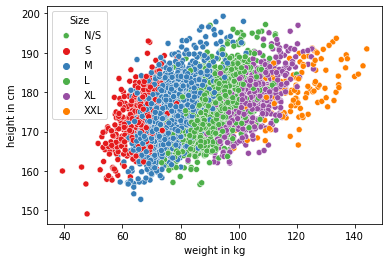

In [96]:
male_skimmed = pd.read_csv('male_skimmed.csv')
weighthg = male_skimmed['weightkg']
weight = weighthg / 10
heightMm = male_skimmed['stature']
height = heightMm / 10
sns.scatterplot(data=male_skimmed, x=weight, y=height, hue='t_shirt_size', palette='Set1')
plt.legend(title='Size', labels=['N/S', 'S', 'M', 'L', 'XL', 'XXL'])
plt.xlabel('weight in kg')
plt.ylabel('height in cm')

## Set_size Female

In [97]:
female_df = pd.read_csv('female.csv')
female_skimmed = female_df[['chestcircumference', 'waistcircumference', 'weightkg', 'stature']]
female_skimmed.insert(4, column='t_shirt_size', value='-')
female_skimmed.to_csv('female_skimmed.csv')

In [98]:
def female_size(chest1, chest2, size, waist1, waist2):
    female_skimmed = pd.read_csv('female_skimmed.csv')
    index = female_skimmed.index
    con = ((female_skimmed['chestcircumference'] > chest1) & (female_skimmed['chestcircumference'] <= chest2)) | \
          ((female_skimmed['waistcircumference'] > waist1) & (female_skimmed['waistcircumference'] <= waist2))
    indices = index[con]
    indices_list = indices.tolist()
    for i in indices_list:
        female_skimmed.at[i, 't_shirt_size'] = size
    female_skimmed.to_csv('female_skimmed.csv')

In [99]:
def size_print_female(size):

    if size == 'XS':
        female_size(690, 800, 1, 580, 708)

    elif size == 'S':
        female_size(810, 930, 2, 708, 836)

    elif size == 'M':
        female_size(920, 1040, 3, 836, 972)

    elif size == 'L':
        female_size(1030, 1150, 4, 972, 1100)

    elif size == 'XL':
        female_size(1140, 1250, 5,1100 , 1228)

    elif size == 'XXL':
        female_size(1250, 1360, 6, 1228, 1350)

In [100]:
size_print_female('XS')
size_print_female('S')
size_print_female('M')
size_print_female('L')
size_print_female('XL')
size_print_female('XXL')

In [101]:
female_skimmed_df = pd.read_csv('female_skimmed.csv')
female_skimmed_df.drop(female_skimmed_df.columns[[0, 1, 2, 3, 4, 5, 6]], axis=1, inplace=True)
female_skimmed_df.to_csv('female_skimmed.csv')

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

weighthg = female_skimmed['weightkg']
weight = weighthg / 10
heightMm = female_skimmed['stature']
height = heightMm / 10

Text(0, 0.5, 'height in cm')

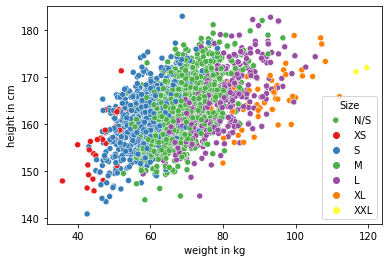

In [103]:
female_skimmed = pd.read_csv('female_skimmed.csv')
sns.scatterplot(data=female_skimmed, x=weight, y=height, hue='t_shirt_size', palette='Set1')
plt.legend(title='Size', labels=['N/S', 'XS', 'S', 'M', 'L', 'XL', 'XXL'])
plt.xlabel('weight in kg')
plt.ylabel('height in cm')

## KNN implementation

In [104]:
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter

In [105]:
def euclidean_dist(dataset, user_input):
    x1, y1 = dataset
    x2, y2 = user_input
    delta_X = x1-x2
    delta_y = y1-y2
    return np.sqrt((delta_X**2) + (delta_y**2))

In [106]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        distances = [euclidean_dist(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [107]:
def run_knn(k_num):
    clf = KNN(k=k_num)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = np.sum(predictions == y_test) / len(y_test)
    return print(acc)

## Male Knn-accuracy

In [108]:
male_knn_df = pd.read_csv('male_skimmed.csv')
male_knn_df = male_knn_df[['stature', 'weightkg', 't_shirt_size']]
male_knn_df.to_csv('male_knn_X_df.csv')

In [109]:
male_knn_df = pd.read_csv('male_knn_X_df.csv')
X_array = np.array(male_knn_df[['stature', 'weightkg']])
y_array = np.array(male_knn_df['t_shirt_size'])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [111]:
run_knn(3)

0.7111383108935129


## Female Knn-accuracy

In [112]:
female_knn_df = pd.read_csv('female_skimmed.csv')
female_knn_df = female_knn_df[['stature', 'weightkg', 't_shirt_size']]
female_knn_df.to_csv('female_knn_X_df.csv')

In [113]:
female_knn_df = pd.read_csv('female_knn_X_df.csv')
X_array = np.array(female_knn_df[['stature', 'weightkg']])
y_array = np.array(female_knn_df['t_shirt_size'])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=42)

In [115]:
run_knn(3)

0.662751677852349
